In [25]:
import numpy as np
import numpy.matlib
import math
import matplotlib.pyplot as plt
from math import floor, ceil
import random 

In [26]:
d=np.loadtxt('HW6_Data.txt');
t=d[:,0:2]
l=np.mat(d[:,2]).T

In [27]:
w1=np.random.ranf((2,2))/(2**0.5) #define weights
w2=np.random.ranf((2,1))/(2**0.5)
b1=np.zeros((1,2)) #define bias
b2=0
bs=1 #define batchsize
x=np.linspace(-2, 2, num=401) #define x coordinates
y1=-(w1[0,0]*x+b1[0,0])/w1[1,0] #define boundaries
y2=-(w1[0,1]*x+b1[0,1])/w1[1,1] 

In [28]:
for i in range(300):
    lu=np.linspace(0,399,num=400)
    lu=random.sample(list(lu),400)  # rearrange the samples
    for k in range(400):
        lu[k]=int(lu[k])
    
    for j in range (400):
        xb=t[lu[(j-1)*bs+1],:]
        yb=l[lu[(j-1)*bs+1],:]
        h=1./(1+np.exp(-(xb@w1+b1))) #calculate hidden layer
        y=1./(1+np.exp(-(h@w2+b2)))  #calculate output layer
        e=yb-y #calculate error
        m=(e*y*(1-y))[0,0]
        m1=np.multiply(w2.T,h)
        w11=-(m*np.multiply(m1,([[1,1]]-h)))@xb.T/bs #conduct backpropogation
        b11=-np.mean(m*np.multiply(m1,(1-h)),axis=0)
        w22=-m*h.T/bs
        b22=-e*y*(1-y)        
        w1=w1-0.3*w11 #renew weights and bias
        b1=b1-0.3*b11
        w2=w2-0.3*w22
        b2=b2-0.3*b22

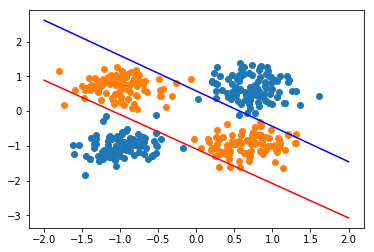

           classifyorange          classifyblue
orange        195                    5
blue           3                    197


In [29]:
y1=-(w1[0,0]*x+b1[0,0])/w1[1,0] #calculate new boundaries
y2=-(w1[0,1]*x+b1[0,1])/w1[1,1]
plt.scatter(t[0:200,0],t[0:200,1])
plt.scatter(t[200:,0],t[200:,1])
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')
plt.show()
count1=0
count2=0
count3=0
count4=0
for i in range(200):#calculate the points that are correctly or incorrectly classified
    if (-(w1[0,0]*t[i,0]+b1[0,0])/w1[1,0])>t[i,1] or (-(w1[0,1]*t[i,0]+b1[0,1])/w1[1,1])<t[i,1]:
        count1=count1+1
    else:
        count2=count2+1
for i in range(200,400):
    if (-(w1[0,0]*t[i,0]+b1[0,0])/w1[1,0])<t[i,1] and (-(w1[0,1]*t[i,0]+b1[0,1])/w1[1,1])>t[i,1]:
        count3=count3+1
    else:
        count4=count4+1
print('           classifyorange          classifyblue')
print('orange       ',count3,'                  ',count4)
print('blue          ',count2,'                  ',count1)

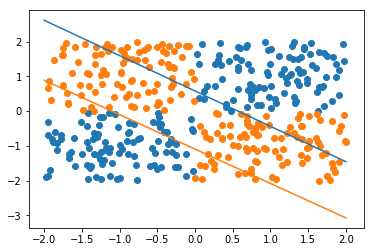

           classifyorange          classifyblue
orange        316                    84
blue           19                    381


In [30]:
test=np.zeros((400,2)) #generate additional data in each quadrant
for i in range(100):
    test[i,0]=np.random.ranf()*2  #keep the data in a 2*2 square
    test[i,1]=np.random.ranf()*2
for i in range(100,200):
    test[i,0]=-np.random.ranf()*2
    test[i,1]=-np.random.ranf()*2
for i in range(200,300):
    test[i,0]=np.random.ranf()*2
    test[i,1]=-np.random.ranf()*2
for i in range(300,400):
    test[i,0]=-np.random.ranf()*2
    test[i,1]=np.random.ranf()*2
plt.scatter(test[0:200,0],test[0:200,1])
plt.scatter(test[200:,0],test[200:,1])
p1=plt.plot(x,y2)
plt.plot(x,y1)
plt.show()
for i in range(200):  
    if (-(w1[0,0]*test[i,0]+b1[0,0])/w1[1,0])>test[i,1] or (-(w1[0,1]*test[i,0]+b1[0,1])/w1[1,1])<test[i,1]:
        count1=count1+1
    else:
        count2=count2+1
for i in range(200,400):
    if (-(w1[0,0]*test[i,0]+b1[0,0])/w1[1,0])<test[i,1] and (-(w1[0,1]*test[i,0]+b1[0,1])/w1[1,1])>test[i,1]:
        count3=count3+1
    else:
        count4=count4+1
print('           classifyorange          classifyblue')
print('orange       ',count3,'                  ',count4)
print('blue          ',count2,'                  ',count1)